In [52]:
import vega_datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
dir(vega_datasets.data)

['7zip',
 'airports',
 'annual_precip',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2_concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare_dependencies',
 'flights_10k',
 'flights_200k',
 'flights_20k',
 'flights_2k',
 'flights_3m',
 'flights_5k',
 'flights_airport',
 'gapminder',
 'gapminder_health_income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa_electricity',
 'iris',
 'jobs',
 'la_riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal_2d',
 'obesity',
 'ohlc',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle_temps',
 'seattle_weather',
 'sf_temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment_across_industries',
 'uniform_2d',
 'us_10m',
 'us_employment',
 'us_state_capitals',
 'volcano',
 'weather',
 'weball26',
 'wheat',

In [3]:
income=vega_datasets.data.income()
income

,name,region,id,pct,total,group
0,Alabama,south,1,0.102,1837292,<10000
1,Alabama,south,1,0.072,1837292,10000 to 14999
2,Alabama,south,1,0.130,1837292,15000 to 24999
3,Alabama,south,1,0.115,1837292,25000 to 34999
4,Alabama,south,1,0.143,1837292,35000 to 49999
...,...,...,...,...,...,...
515,Puerto Rico,other,72,0.035,1254274,75000 to 99999
516,Puerto Rico,other,72,0.094,1254274,50000 to 74999
517,Puerto Rico,other,72,0.024,1254274,100000 to 149999
518,Puerto Rico,other,72,0.008,1254274,150000 to 199999


In [4]:
income.nunique()

name       52
region      5
id         52
pct       165
total      52
group      10
dtype: int64

In [5]:
income["region"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
515    False
516    False
517    False
518    False
519    False
Name: region, Length: 520, dtype: bool

In [6]:
income["region"].value_counts()

south        170
west         130
midwest      120
northeast     90
other         10
Name: region, dtype: int64

In [7]:
income["region"]=income["region"].map({"south":170,"west":130,"midwest":120,"northeast":90,"other":10})

In [8]:
income

,name,region,id,pct,total,group
0,Alabama,170,1,0.102,1837292,<10000
1,Alabama,170,1,0.072,1837292,10000 to 14999
2,Alabama,170,1,0.130,1837292,15000 to 24999
3,Alabama,170,1,0.115,1837292,25000 to 34999
4,Alabama,170,1,0.143,1837292,35000 to 49999
...,...,...,...,...,...,...
515,Puerto Rico,10,72,0.035,1254274,75000 to 99999
516,Puerto Rico,10,72,0.094,1254274,50000 to 74999
517,Puerto Rico,10,72,0.024,1254274,100000 to 149999
518,Puerto Rico,10,72,0.008,1254274,150000 to 199999


In [9]:
columns=["name","pct"]
income1=income.drop(columns=columns)

In [ ]:
income1

,region,id,total,group
0,170,1,1837292,<10000
1,170,1,1837292,10000 to 14999
2,170,1,1837292,15000 to 24999
3,170,1,1837292,25000 to 34999
4,170,1,1837292,35000 to 49999
...,...,...,...,...
515,10,72,1254274,75000 to 99999
516,10,72,1254274,50000 to 74999
517,10,72,1254274,100000 to 149999
518,10,72,1254274,150000 to 199999


In [10]:
income1["group"]

0                <10000
1        10000 to 14999
2        15000 to 24999
3        25000 to 34999
4        35000 to 49999
             ...       
515      75000 to 99999
516      50000 to 74999
517    100000 to 149999
518    150000 to 199999
519             200000+
Name: group, Length: 520, dtype: object

In [11]:
# Define the range_mapping dictionary
range_mapping = {
    '<10000': 5000,
    '10000 to 14999': 12500,
    '15000 to 24999': 20000,
    '25000 to 34999': 30000,
    '35000 to 49999': 42500,
    '75000 to 99999': 87500,
    '50000 to 74999': 62500,
    '100000 to 149999': 125000,
    '150000 to 199999': 175000,
    '200000+': 200000
}

# Use the map function to replace the values in the "group" column of the 'income1' DataFrame
income1['group'] = income1['group'].map(range_mapping)


In [12]:
income1

,region,id,total,group
0,170,1,1837292,5000
1,170,1,1837292,12500
2,170,1,1837292,20000
3,170,1,1837292,30000
4,170,1,1837292,42500
...,...,...,...,...
515,10,72,1254274,87500
516,10,72,1254274,62500
517,10,72,1254274,125000
518,10,72,1254274,175000


In [13]:
income1.nunique()

region     5
id        52
total     52
group     10
dtype: int64

In [14]:
wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(income1)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [15]:
wcss

[2929940760299719.0,
 965666232942304.5,
 431074276476536.06,
 258342693696631.9,
 113513837861256.33,
 72283667801687.97,
 49540097184519.016,
 28559129260810.73,
 18750630219046.402,
 14562723088793.223]

In [16]:
kmeans.labels_

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6,

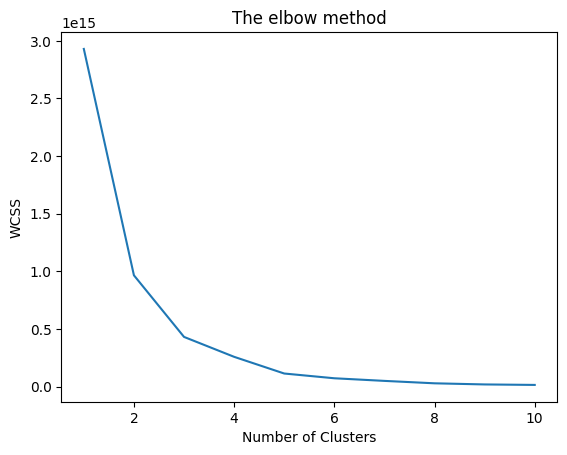

In [17]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
kmeans = KMeans(n_clusters=4, random_state=42, init='k-means++')
kmeans.fit(income1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [27]:
income1 = pd.DataFrame(income, columns=income1.columns)
income1.head()

,region,id,total,group
0,170,1,1837292,<10000
1,170,1,1837292,10000 to 14999
2,170,1,1837292,15000 to 24999
3,170,1,1837292,25000 to 34999
4,170,1,1837292,35000 to 49999


In [28]:
df_final = income1.copy()
df_final['cluster'] = kmeans.labels_
df_final.head()

,region,id,total,group,cluster
0,170,1,1837292,<10000,0
1,170,1,1837292,10000 to 14999,0
2,170,1,1837292,15000 to 24999,0
3,170,1,1837292,25000 to 34999,0
4,170,1,1837292,35000 to 49999,0


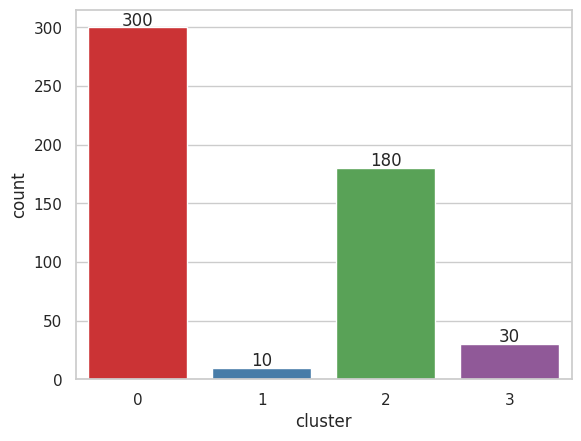

In [32]:
sns.set(style="whitegrid", palette='Set1')
ax = sns.countplot(x='cluster', data=df_final, label='Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

In [33]:
df_final.groupby('cluster').mean()

<ipython-input-33-afdea5822216>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final.groupby('cluster').mean()


,region,id,total
cluster,,,
0,131.000000,29.933333,8.712039e+05
1,130.000000,6.000000,1.258172e+07
2,130.555556,30.500000,3.051096e+06
3,143.333333,32.000000,7.782672e+06


In [34]:
df_final_2 = df_final.copy()
df_final_2['cluster'] = df_final_2['cluster'].map({0: "Seguro", 1: "Em dívida", 2: "Desfavorecido", 3: "Bem-sucedido"})

Text(0, 0.5, 'Qnt. compras')

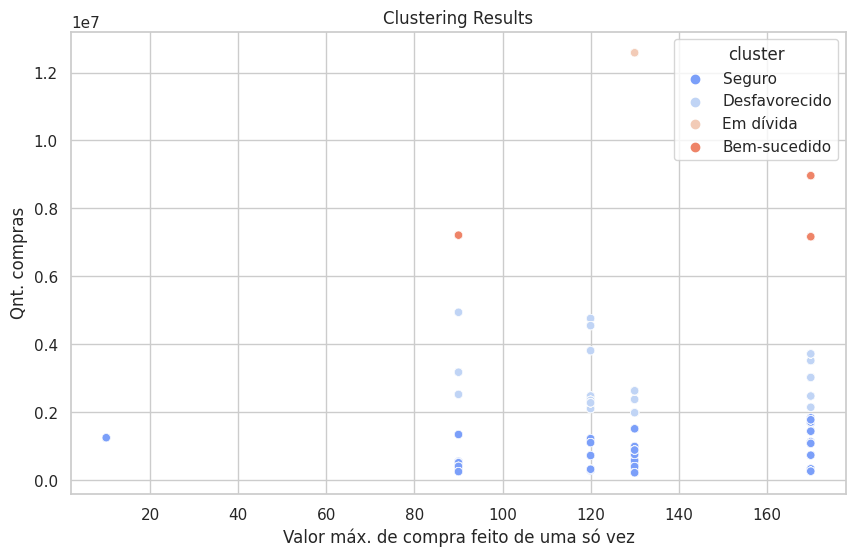

In [36]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x=df_final_2['region'], y=df_final_2['total'], hue = df_final_2['cluster'], palette='coolwarm')
plt.title("Clustering Results")
plt.xlabel("Valor máx. de compra feito de uma só vez")
plt.ylabel("Qnt. compras")

# 2 data set

In [58]:
github=vega_datasets.data.github()
github

,time,count
0,2015-01-01 01:00:00,2
1,2015-01-01 04:00:00,3
2,2015-01-01 05:00:00,1
3,2015-01-01 08:00:00,1
4,2015-01-01 09:00:00,3
...,...,...
950,2015-05-29 17:00:00,1
951,2015-05-29 19:00:00,1
952,2015-05-30 00:00:00,10
953,2015-05-30 09:00:00,1


In [59]:
github.nunique()

time     955
count     26
dtype: int64

In [60]:
github=github.drop("time",axis=1)

In [61]:
github

,count
0,2
1,3
2,1
3,1
4,3
...,...
950,1
951,1
952,10
953,1


In [62]:
github.dtypes

count    int64
dtype: object

In [63]:
wcss=[]
for i in range(1,12):
  model=KMeans(i)
  model.fit(github)
  wcss.append(model.inertia_)
wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[16039.983246073261,
 6403.201415222109,
 3030.3194648317985,
 1726.4330878221258,
 917.1372285399799,
 676.0114086560695,
 468.35251064724815,
 310.58584398058065,
 234.22180889286142,
 159.89883282586632,
 125.03822005619958]

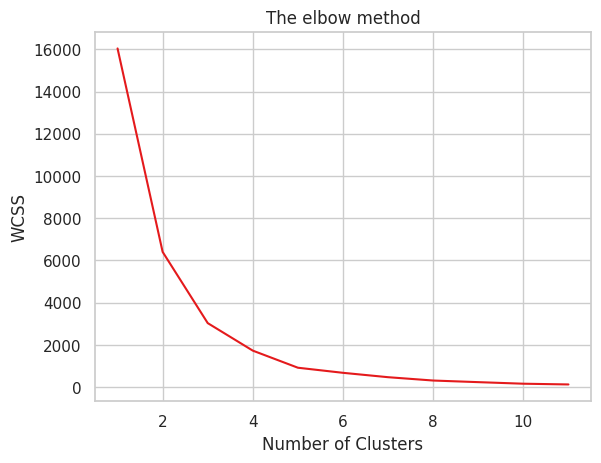

In [64]:
plt.plot(range(1,12), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [65]:
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++')
kmeans.fit(github)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [66]:
model.fit_predict(github)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 7,  9,  0,  0,  9,  0,  9,  0,  0,  7,  0,  9,  7,  7,  9,  0,  7,
        7,  0,  7,  7,  0,  0,  7,  7,  7,  0,  0,  0,  8,  7,  0,  9,  0,
        0,  7,  3,  7,  7,  3,  0,  0,  0,  2,  0, 10,  0,  0,  0,  0,  0,
        0,  0,  7,  0,  7,  0,  0,  5,  7,  0,  7,  0,  7,  0,  2,  0,  0,
        0,  7,  3,  7,  7,  3,  0,  0,  7,  0,  7,  7,  0,  7,  0,  0,  2,
        0,  0,  9,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  9,  0,  7,
        3,  7,  0,  8,  0,  0,  7,  7,  0,  0,  0,  0,  0,  0,  7,  7,  3,
        2,  7,  0,  0,  2,  0,  9,  7,  7,  7,  0,  9,  2,  0,  2,  9,  0,
        7,  9,  0,  0,  0,  8,  3,  0,  0,  7,  0,  0,  0,  0,  1,  0,  3,
        0,  0,  8,  0,  9,  1,  0,  0,  7,  0,  0,  0,  0,  5,  0,  2,  0,
        0,  0,  8,  7,  7,  0,  9,  7,  7,  3,  7,  5,  7,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  7,  9,  0,  0,  1,  3,  0,  3,  7,  2,  9,
        3,  9,  7,  0,  0,  2,  0,  3,  8,  0,  0,  0,  0,  0,  0,  9,  7,
        0,  0,  0,  0,  0

In [67]:
identitycluster=model.fit_predict(github)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
github["cluster"]=identitycluster

In [69]:
github

,count,cluster
0,2,8
1,3,0
2,1,2
3,1,2
4,3,0
...,...,...
950,1,2
951,1,2
952,10,10
953,1,2


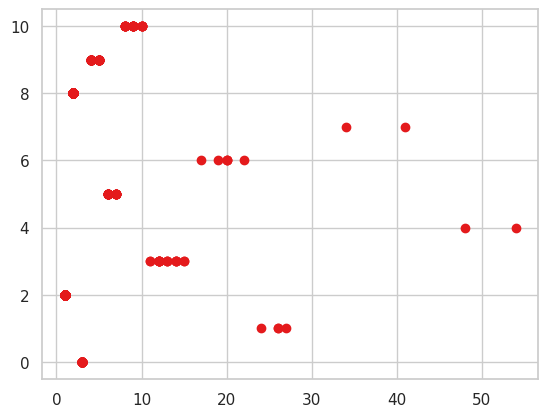

In [71]:
plt.scatter(github["count"],github["cluster"])
plt.show()

In [72]:
df_final = github.copy()
df_final['cluster'] = kmeans.labels_
df_final.head()

,count,cluster
0,2,1
1,3,0
2,1,1
3,1,1
4,3,0


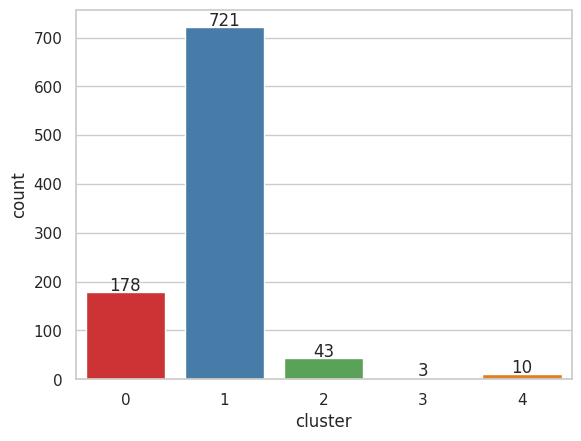

In [73]:
sns.set(style="whitegrid", palette='Set1')
ax = sns.countplot(x='cluster', data=df_final, label='Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

In [74]:
df_final.groupby('cluster').mean()

,count
cluster,
0,4.084270
1,1.260749
2,10.744186
3,47.666667
4,23.800000


# 3 data set

In [75]:
population=vega_datasets.data.population()
population

,year,age,sex,people
0,1850,0,1,1483789
1,1850,0,2,1450376
2,1850,5,1,1411067
3,1850,5,2,1359668
4,1850,10,1,1260099
...,...,...,...,...
565,2000,80,2,3221898
566,2000,85,1,970357
567,2000,85,2,1981156
568,2000,90,1,336303


In [76]:
population.nunique()

year       15
age        19
sex         2
people    570
dtype: int64

In [77]:
population=population.drop("people",axis=1)

In [78]:
population

,year,age,sex
0,1850,0,1
1,1850,0,2
2,1850,5,1
3,1850,5,2
4,1850,10,1
...,...,...,...
565,2000,80,2
566,2000,85,1
567,2000,85,2
568,2000,90,1


In [80]:
wcss=[]
for i in range(1,11):
  model=KMeans(i)
  model.fit(population)
  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [81]:
wcss

[1669989.1666666646,
 745756.7857142866,
 551788.4478021977,
 413650.4263544493,
 311064.79416809604,
 229726.75751879683,
 198525.6078785531,
 171463.89867588133,
 155068.55598592435,
 139590.8717453782]

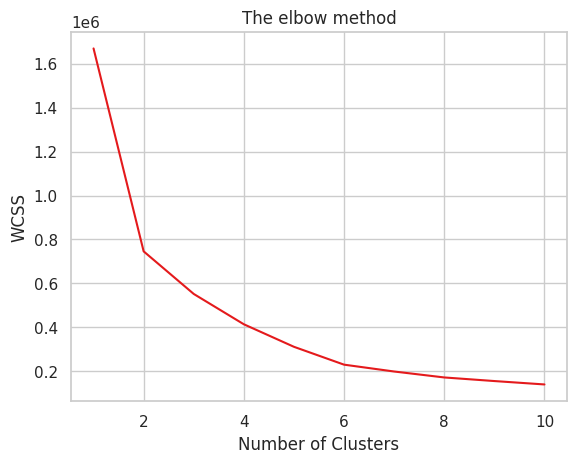

In [82]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [88]:
model=KMeans(4)
model.fit(population)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [89]:
model.fit_predict(population)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [90]:
identitycluster=model.fit_predict(population)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [91]:
population["cluster"]=identitycluster

In [92]:
population


,year,age,sex,cluster
0,1850,0,1,2
1,1850,0,2,2
2,1850,5,1,2
3,1850,5,2,2
4,1850,10,1,2
...,...,...,...,...
565,2000,80,2,1
566,2000,85,1,1
567,2000,85,2,1
568,2000,90,1,1


In [94]:
df_final = population.copy()
df_final['cluster'] =model.labels_
df_final.head()

,year,age,sex,cluster
0,1850,0,1,2
1,1850,0,2,2
2,1850,5,1,2
3,1850,5,2,2
4,1850,10,1,2


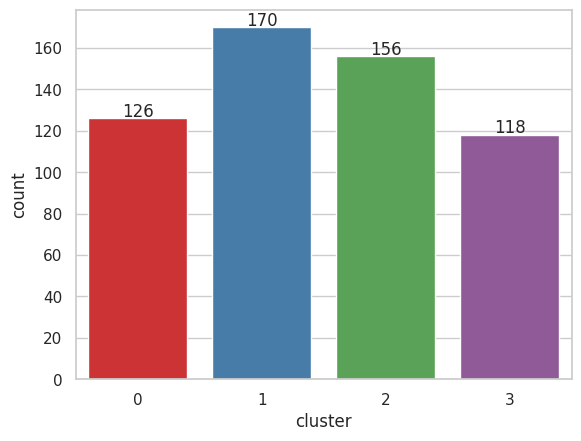

In [95]:
sns.set(style="whitegrid", palette='Set1')
ax = sns.countplot(x='cluster', data=df_final, label='Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')